**ABOUT THE COLUMNS**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

**PROJECT AIM**

The goal of this project is to predict the insurance cost of the patients given the columns above.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
data = pd.read_csv("/content/insurance.csv")

**Getting To Know Our Dataset**

In [4]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the text colunms we have are Sex, Smokers and Regoin while the rest are integers and float.

In [7]:
#to know if there are missing values in the dataset
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in any of the colunms.

In [8]:
#to know the statistical properties of the numerical colunms in our datset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Below are what can be derived from the above;
- the mean age is 39, the minimum age is 18years, the maximum age is 64 years. Also, the mean and the meadian are close so, the datset is normally distributed
- the higest numer of childern of the patiets is 5, while the least is 0.

### **EDA STAGE**

**We were given a direction on the analysis to carry which is below;**

● Analyze the data and draw meaningful conclusions from the data.

○ Examine the distribution of Bmi (Body Mass Index)

○ Examine the relationship between “smoker” and “charges”

○ Examine the relationship between “smoker” and “region”.

○ Examine the relationship between “bmi” and “sex”.

○ Find the "region" with the most "children".

○ Examine the relationship between “age” and “bmi”.

○ Examine the relationship between “bmi” and “children”.

○ Is there an outlier in the "bmi" variable? Please review.

○ Examine the relationship between “bmi” and “charges”.

○ Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

# 1. Distribution of BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


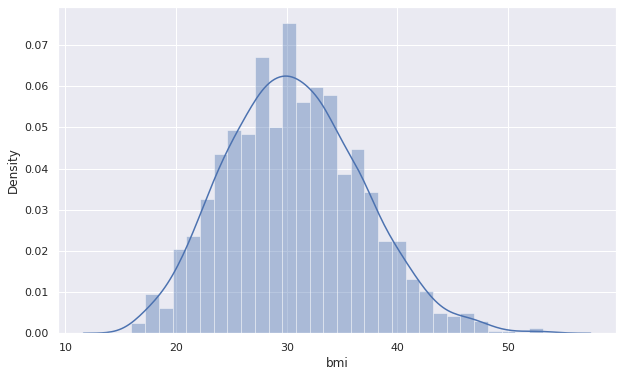

In [9]:
sns.distplot(data["bmi"], kde=True, bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


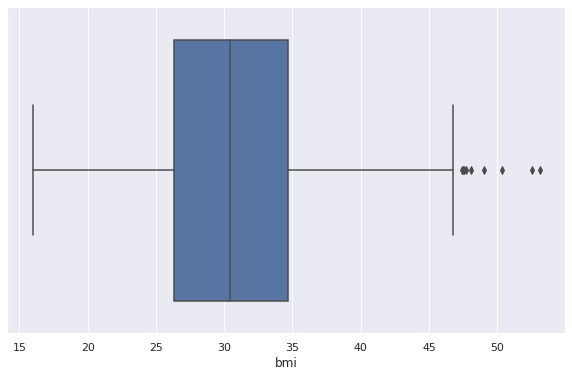

In [10]:
sns.boxplot(data["bmi"])

The BMI could be considered a normal distribution as most of the bmi is close to the mean bmi which is 30. Although, there exist a skew to the right which likely iplies the presence of an outlier in the bmi.
The boxplot above has confirmed the presensce of the outliers in the bmi.

## 2. Relationship between smokers and charges

In [11]:
data.groupby("smoker")[("charges")].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

The average charges for smokers is approximately four times the average charges for non-smokers.

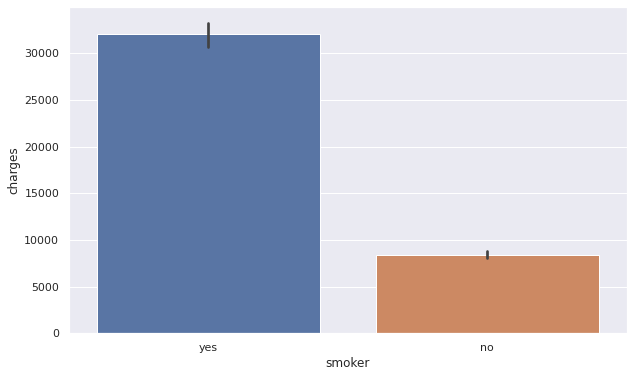

In [12]:
sns.barplot(data= data, x= "smoker", y= "charges")

From the above, we can see that we have more people who smoke than those that dont.

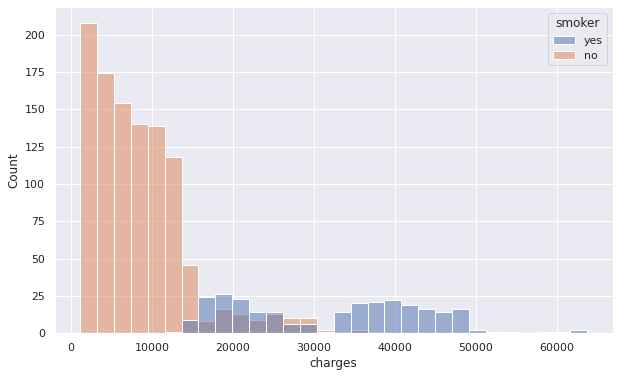

In [13]:
smokercharge = sns.histplot(data= data, x = "charges",  hue = "smoker")

From the above chart, we can see that the charges for those that smoke are higher ranging from 15,000 and above while those that do not smoke generally incur less charges usually below 15,000.

## **3. Relationship between smokers and Region**

In [14]:
data.groupby(["region", "smoker"]).agg({"smoker":"count"})

smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

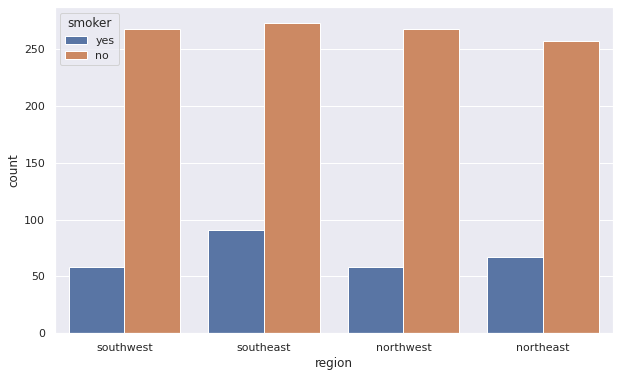

In [15]:
sns.countplot(data= data, x= "region", hue= "smoker")

From the visual above, we can see that the southeast region has the higest number of smokers than in any other region.

## **4. Relationship between BMi and Sex**

In [22]:
data.groupby("sex").agg({"bmi" :"mean"})

,bmi
sex,
female,30.377749
male,30.943129


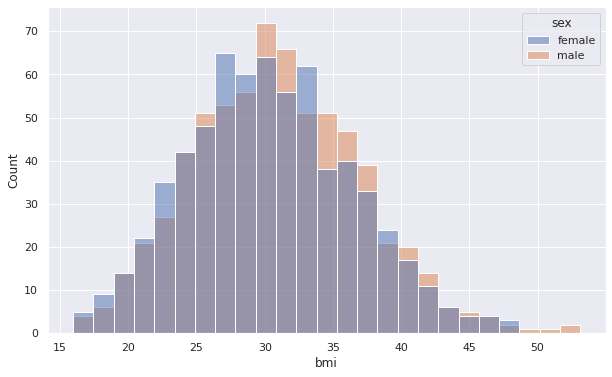

In [26]:
sns.histplot(data=data, x= "bmi", hue= "sex")

There is no much difference in both the bmi but the males miis slighly higher thanthe female.

## 5. Region with the most number of childre.**bold text**

In [38]:
data.children.value_counts(normalize= True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

In [37]:
data.groupby("region")[["children"]].sum()

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


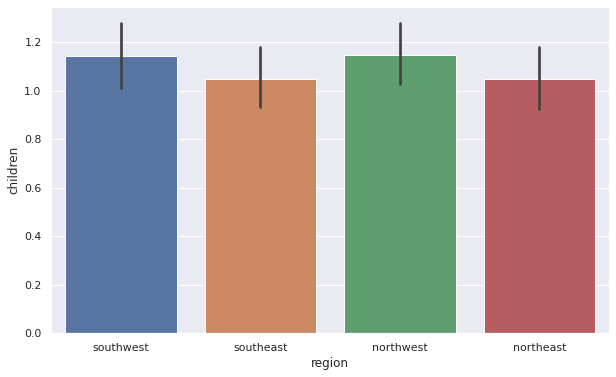

In [47]:
sns.barplot(data=data, x="region", y="children")

It can be seen that the southwest has the higehst number of children.

## **6. Relationship Between Age and BMI**

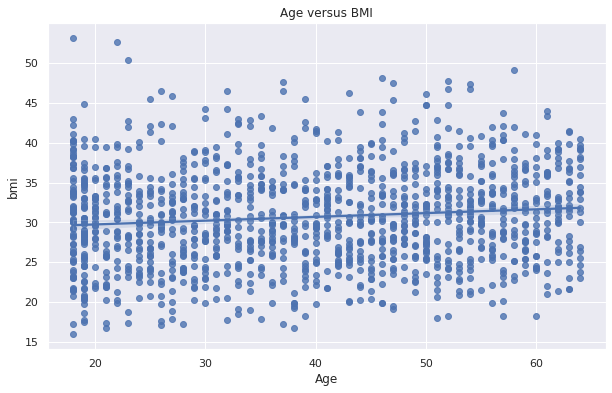

In [73]:
g = sns.regplot(x = 'age', y = 'bmi', data = data)
g.set(xlabel = 'Age', ylabel = 'bmi', title = 'Age versus BMI');

Since we cant tell the actual relationship using this diagram, we have to use binning method which will divide the age in three parts which are, Old - 45 to 64 , middle age - 35 to 45 and youth - 18 to 35

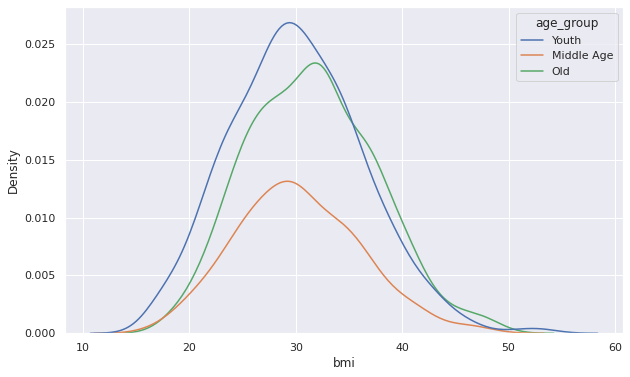

In [75]:
max_age = data['age'].max()
min_age = data['age'].min()
bins = [min_age, 35, 45, max_age]
labels = ['Youth', 'Middle Age', 'Old']
data['age_group'] = pd.cut(x = data['age'], bins = bins, labels = labels, include_lowest = True)

# visualize
sns.kdeplot(x = 'bmi', data = data, hue = 'age_group');

we have more youths falling in the mean bmi category which is between 28 and 30.

## **7. Relationship Between BMI and Children**

In [52]:
data.groupby("children")[["bmi"]].mean()

,bmi
children,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


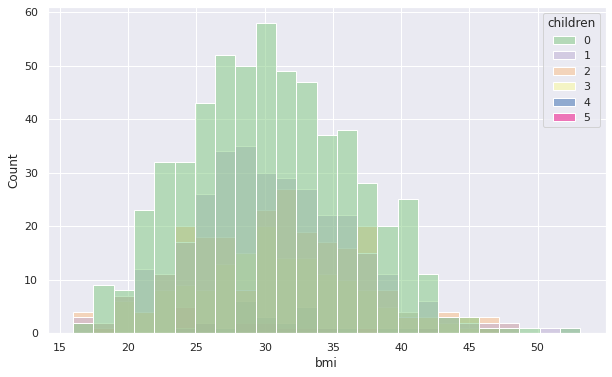

In [63]:
sns.histplot(data= data, x = "bmi", hue ="children", palette = "Accent")

There are more people with no children and lesser people having 5 to 6 children.

## **8. Is There An Outlier In Bmi?** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


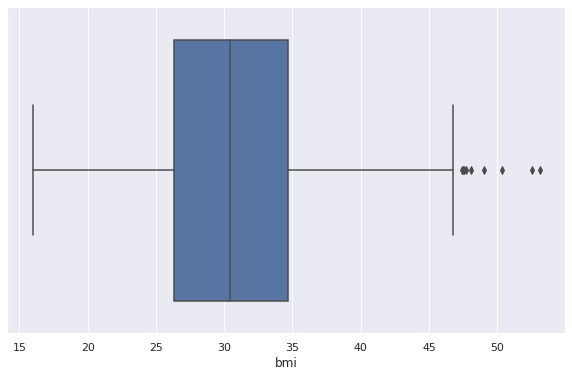

In [71]:
sns.boxplot(data["bmi"])

outliers are present in the BMi and we have a total pf 7 outliers with appreoximate values of 46,66.6, 47,49, 50.5,53 and 53.5.

## **9. Relationship Between Bmi and Charges**

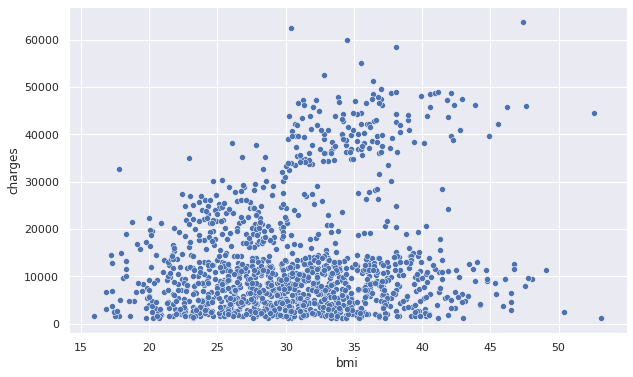

In [80]:
sns.scatterplot(data=data, x = "bmi", y= "charges")

The more the bmi, the more the charges.

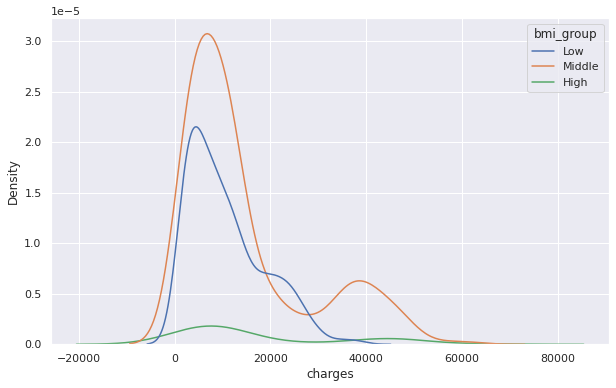

In [78]:
max_age = data['bmi'].max()
min_age = data['bmi'].min()
bins = [min_age,28, 41, max_age]
labels = ['Low', 'Middle', 'High']
data['bmi_group'] = pd.cut(x = data['bmi'], bins = bins, labels = labels, include_lowest = True)

# visualize
sns.kdeplot(x = 'charges', data = data, hue = 'bmi_group');

In [86]:
data.groupby(["region","smoker"])[["bmi"]].sum()

bmi
region    smoker          
northeast no      7538.345
          yes     1913.870
northwest no      7799.785
          yes     1690.145
southeast no      9129.780
          yes     3011.800
southwest no      8145.600
          yes     1798.300

In [87]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

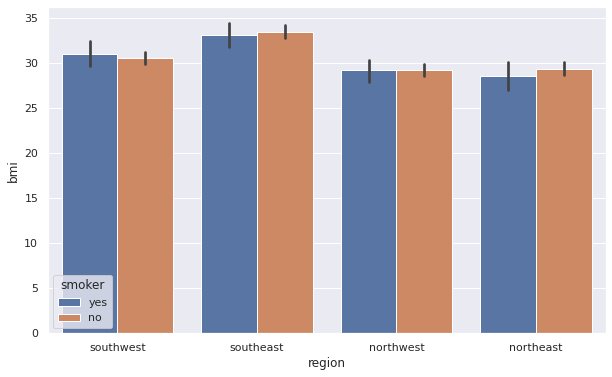

In [81]:
sns.barplot(data=data, x= "region", y= "bmi", hue= "smoker")

It can be seen that there are more smokers in the southeast and their bmi is high.